<a href="https://colab.research.google.com/github/raziyasultan/AI_ML_internship/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Used Car Dataset.csv')

In [4]:
df.head(5)

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [5]:
df.shape

(1553, 15)

In [6]:
df.describe()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,776.000000,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,448.456798,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,0.000000,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,388.000000,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,776.000000,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1164.000000,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [7]:
df.isnull()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1550,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1551,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [9]:
df['mileage(kmpl)'].value_counts()

18.90      56
1197.00    53
18.60      35
21.40      35
18.00      31
           ..
25.24       1
2198.00     1
22.48       1
12.35       1
18.78       1
Name: mileage(kmpl), Length: 332, dtype: int64

In [10]:
df['mileage(kmpl)'].fillna(56, inplace = True)

In [11]:
df['engine(cc)'].value_counts()

1197.0     260
1497.0      83
1199.0      66
998.0       64
1198.0      62
          ... 
831.0        1
4036.0       1
2454.0       1
885.0        1
11345.0      1
Name: engine(cc), Length: 147, dtype: int64

In [12]:
df['engine(cc)'].fillna(260, inplace = True)

In [13]:
df['max_power(bhp)'].value_counts()

1197.0     260
1497.0      83
1199.0      66
998.0       64
1198.0      62
          ... 
831.0        1
4036.0       1
2454.0       1
885.0        1
11345.0      1
Name: max_power(bhp), Length: 147, dtype: int64

In [14]:
df['max_power(bhp)'].fillna(260, inplace = True)

In [15]:
df['torque(Nm)'].value_counts()

8180.0      60
1213.0      38
8186.0      37
1173.0      36
831.0       35
            ..
17063.0      1
7510.0       1
125.0        1
108495.0     1
6706.0       1
Name: torque(Nm), Length: 281, dtype: int64

In [16]:
df['torque(Nm)'].fillna(60, inplace = True)

In [17]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

In [18]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')


**LINEAR REGRESSION**

In [19]:
X = df['mileage(kmpl)'].values.reshape(-1, 1)
y = df['kms_driven'].values.reshape(-1, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-6.66671384]]
Intercept: [54103.41764464]


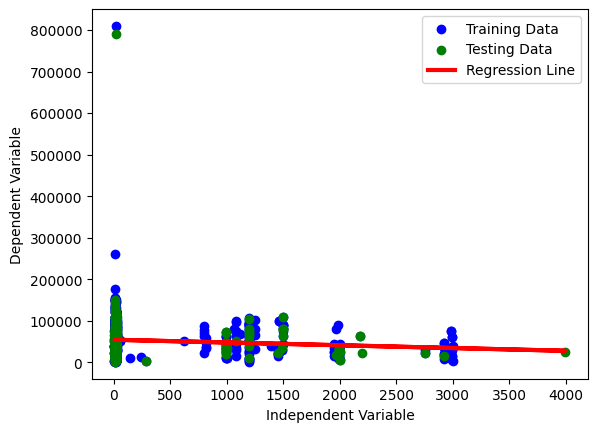

In [25]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()

**In the above graph the Red line indicates regression nothing but the predicted values and the points are the actual values the difference between the actual values and predicted values can be known as random error**

**Lasso Regression**

In [71]:
lasso_model = Lasso(alpha=0.01)

Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation.

In [72]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [73]:
lasso_predictions = lasso_model.predict(X_test)

**Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients**

In [74]:
from sklearn.metrics import mean_squared_error
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
print(f"Lasso Regression RMSE: {lasso_rmse}")

Lasso Regression RMSE: 51134.33290829308


Due to the fact that coefficients will be shrunk towards a mean of zero, less important features in a dataset are eliminated when penalized.

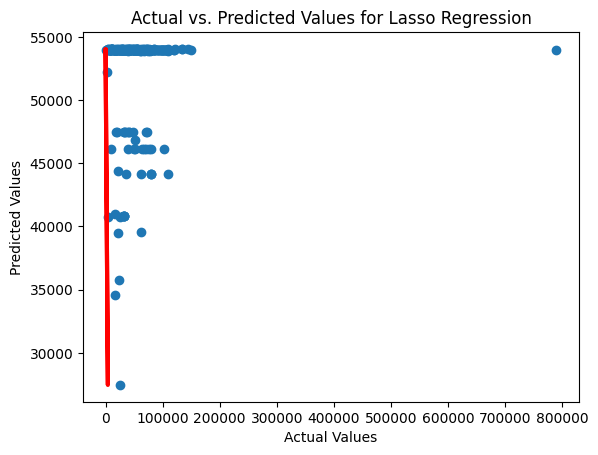

In [75]:
plt.scatter(y_test, lasso_predictions)
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Lasso Regression")
plt.show()

**To reduce the error between actual values and predicted values. It makes the coefficient to zero if it is less important**

In [77]:
ridge_model = Ridge(alpha=0.01)

In [78]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [79]:
ridge_predictions = ridge_model.predict(X_test)

In [80]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"Ridge Regression RMSE: {ridge_rmse}")

Ridge Regression RMSE: 51134.33290809986


**Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients**

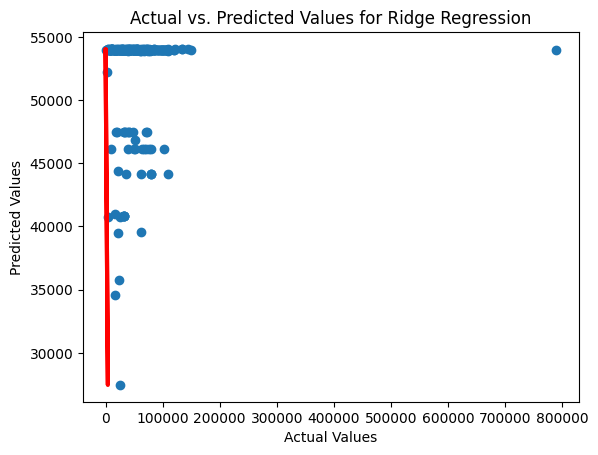

In [81]:
plt.scatter(y_test, ridge_predictions)
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Ridge Regression")
plt.show()

**Similar to the lasso regression, ridge regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square.**